In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)

from sklearn.linear_model.logistic import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


In [2]:
# Load data
path = '/Users/rodrigovillatoro/Documents/Harbour.Space/07_ml_1/data/winequality-red.csv'

names = [
    'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
    'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
    'density', 'pH', 'sulphates', 'alcohol', 'quality'
]

red = pd.read_csv(path, sep=';')

In [3]:
# Extract X and Y
y = red['quality']
red = red.drop(['quality'], axis=1)

In [4]:
# Count number of samples for each quality value
y.value_counts(sort=False)

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

In [5]:
# Reduce number of classes
classes = {
    3: 0,  # Terrible
    4: 0, 
    5: 1,  # Bad
    6: 2,  # Regular
    7: 3,  # Good
    8: 3   # 
}
y = y.replace(classes)

In [6]:
# Count number of samples for each quality value
y.value_counts(sort=False)

0     63
1    681
2    638
3    217
Name: quality, dtype: int64

In [7]:
# Normalize all reatures
min_max_scaler = MinMaxScaler()
red_scaled = min_max_scaler.fit_transform(red)
red_normalized = pd.DataFrame(red_scaled, columns=red.columns)

In [8]:
red_normalized.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

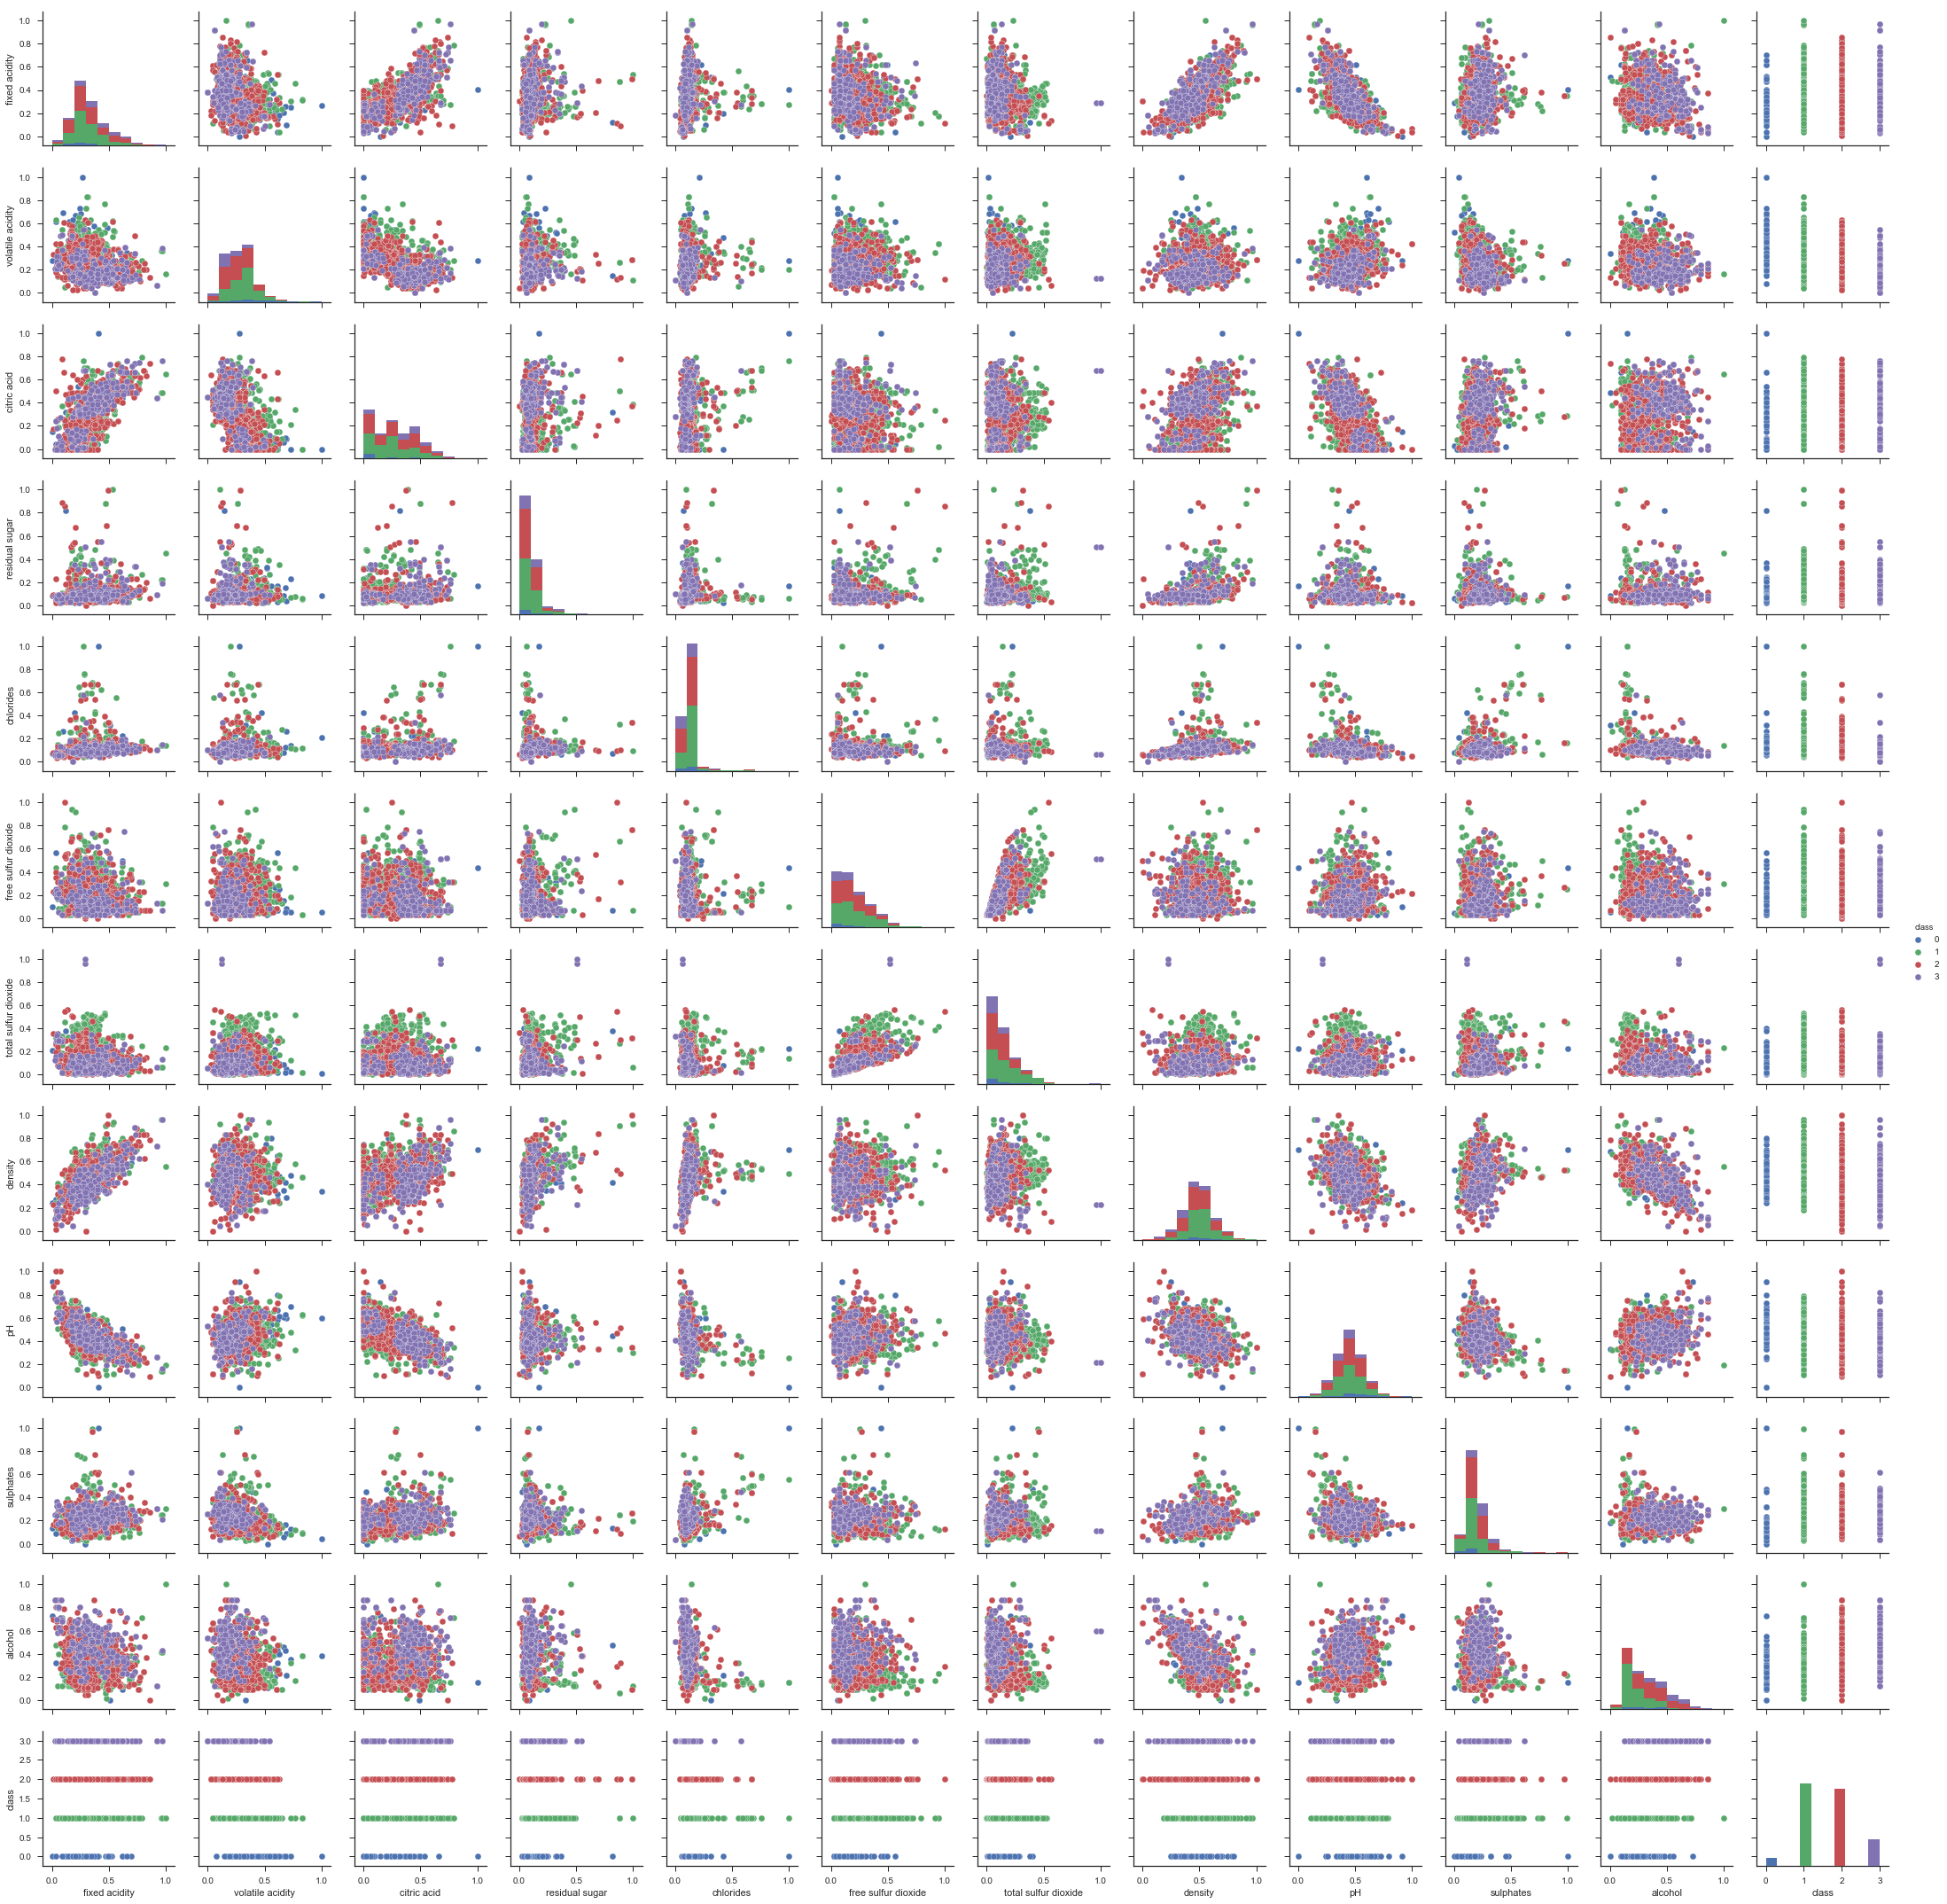

In [9]:
# Temp dataframe for pairplot
new_df = red_normalized.copy()
new_df['class'] = y

# Pairplot
sns.pairplot(new_df, hue='class')
plt.show()

### There is a lot going on in this graph, but we get the idea that the samples are all over the place. I don't see how we could use two of these to try to make a good classification.

----

## Using all features, make logistic regression

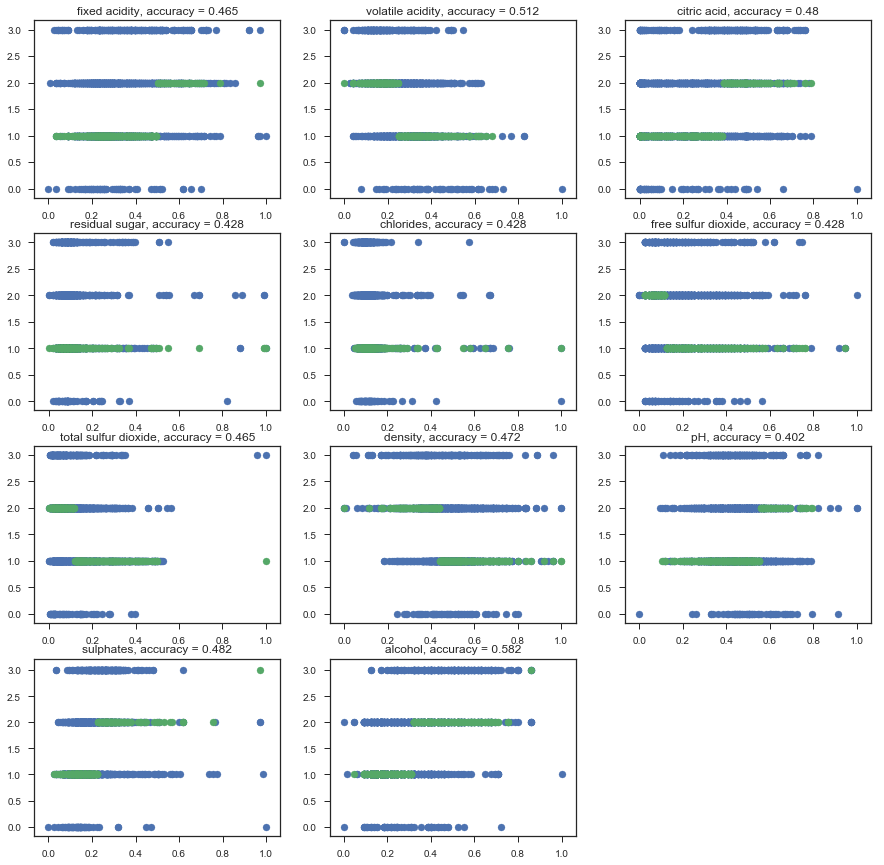

In [10]:
columns = red_normalized.columns
fig = plt.figure(figsize=(15, 15))

for i in range(len(columns)):
    
    X = red_normalized[columns[i]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    
    regressor = LogisticRegression()
    regressor.fit(X_train.values.reshape(-1, 1), y_train)
    predictions = regressor.predict(X_test.values.reshape(-1, 1))
    accuracy = round(regressor.score(X_test.values.reshape(-1, 1), y_test), 3)
    
    ax = fig.add_subplot(4, 3, i + 1)
    ax.set_title('{}, accuracy = {}'.format(columns[i], accuracy))
    ax.scatter(X, y)
    ax.scatter(X_test, predictions)
    
plt.show()


#### We see that all the regressor is doing is trying to classify the new points between the two middle classes, that represent more than 80% of the datapoints. 

#### In all cases, the result is very poor.. with accurracy of around 40%-60%. 

----

### Even if we try to do the regression with all the features, results are still not promising. 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(red_normalized, y, random_state=1)
clf = LogisticRegression()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [12]:
clf.score(X_test, y_test)

0.59499999999999997

In [13]:
confusion_matrix(y_test, predictions)

array([[  0,  13,   4,   0],
       [  0, 141,  29,   1],
       [  0,  76,  87,   4],
       [  0,   5,  30,  10]])

----

## What happens if we reduce the number of classes to just 2?

In [14]:
# Reduce number of classes
classes = {
    0: 0,  # Not OK
    1: 0, 
    2: 0,  
    3: 1,  # OK
}
y = y.replace(classes)

In [15]:
# Count number of samples for each quality value
y.value_counts(sort=False)

0    1382
1     217
Name: quality, dtype: int64

In [16]:
# Temp dataframe for pairplot
new_df = red_normalized.copy()
new_df['class'] = y

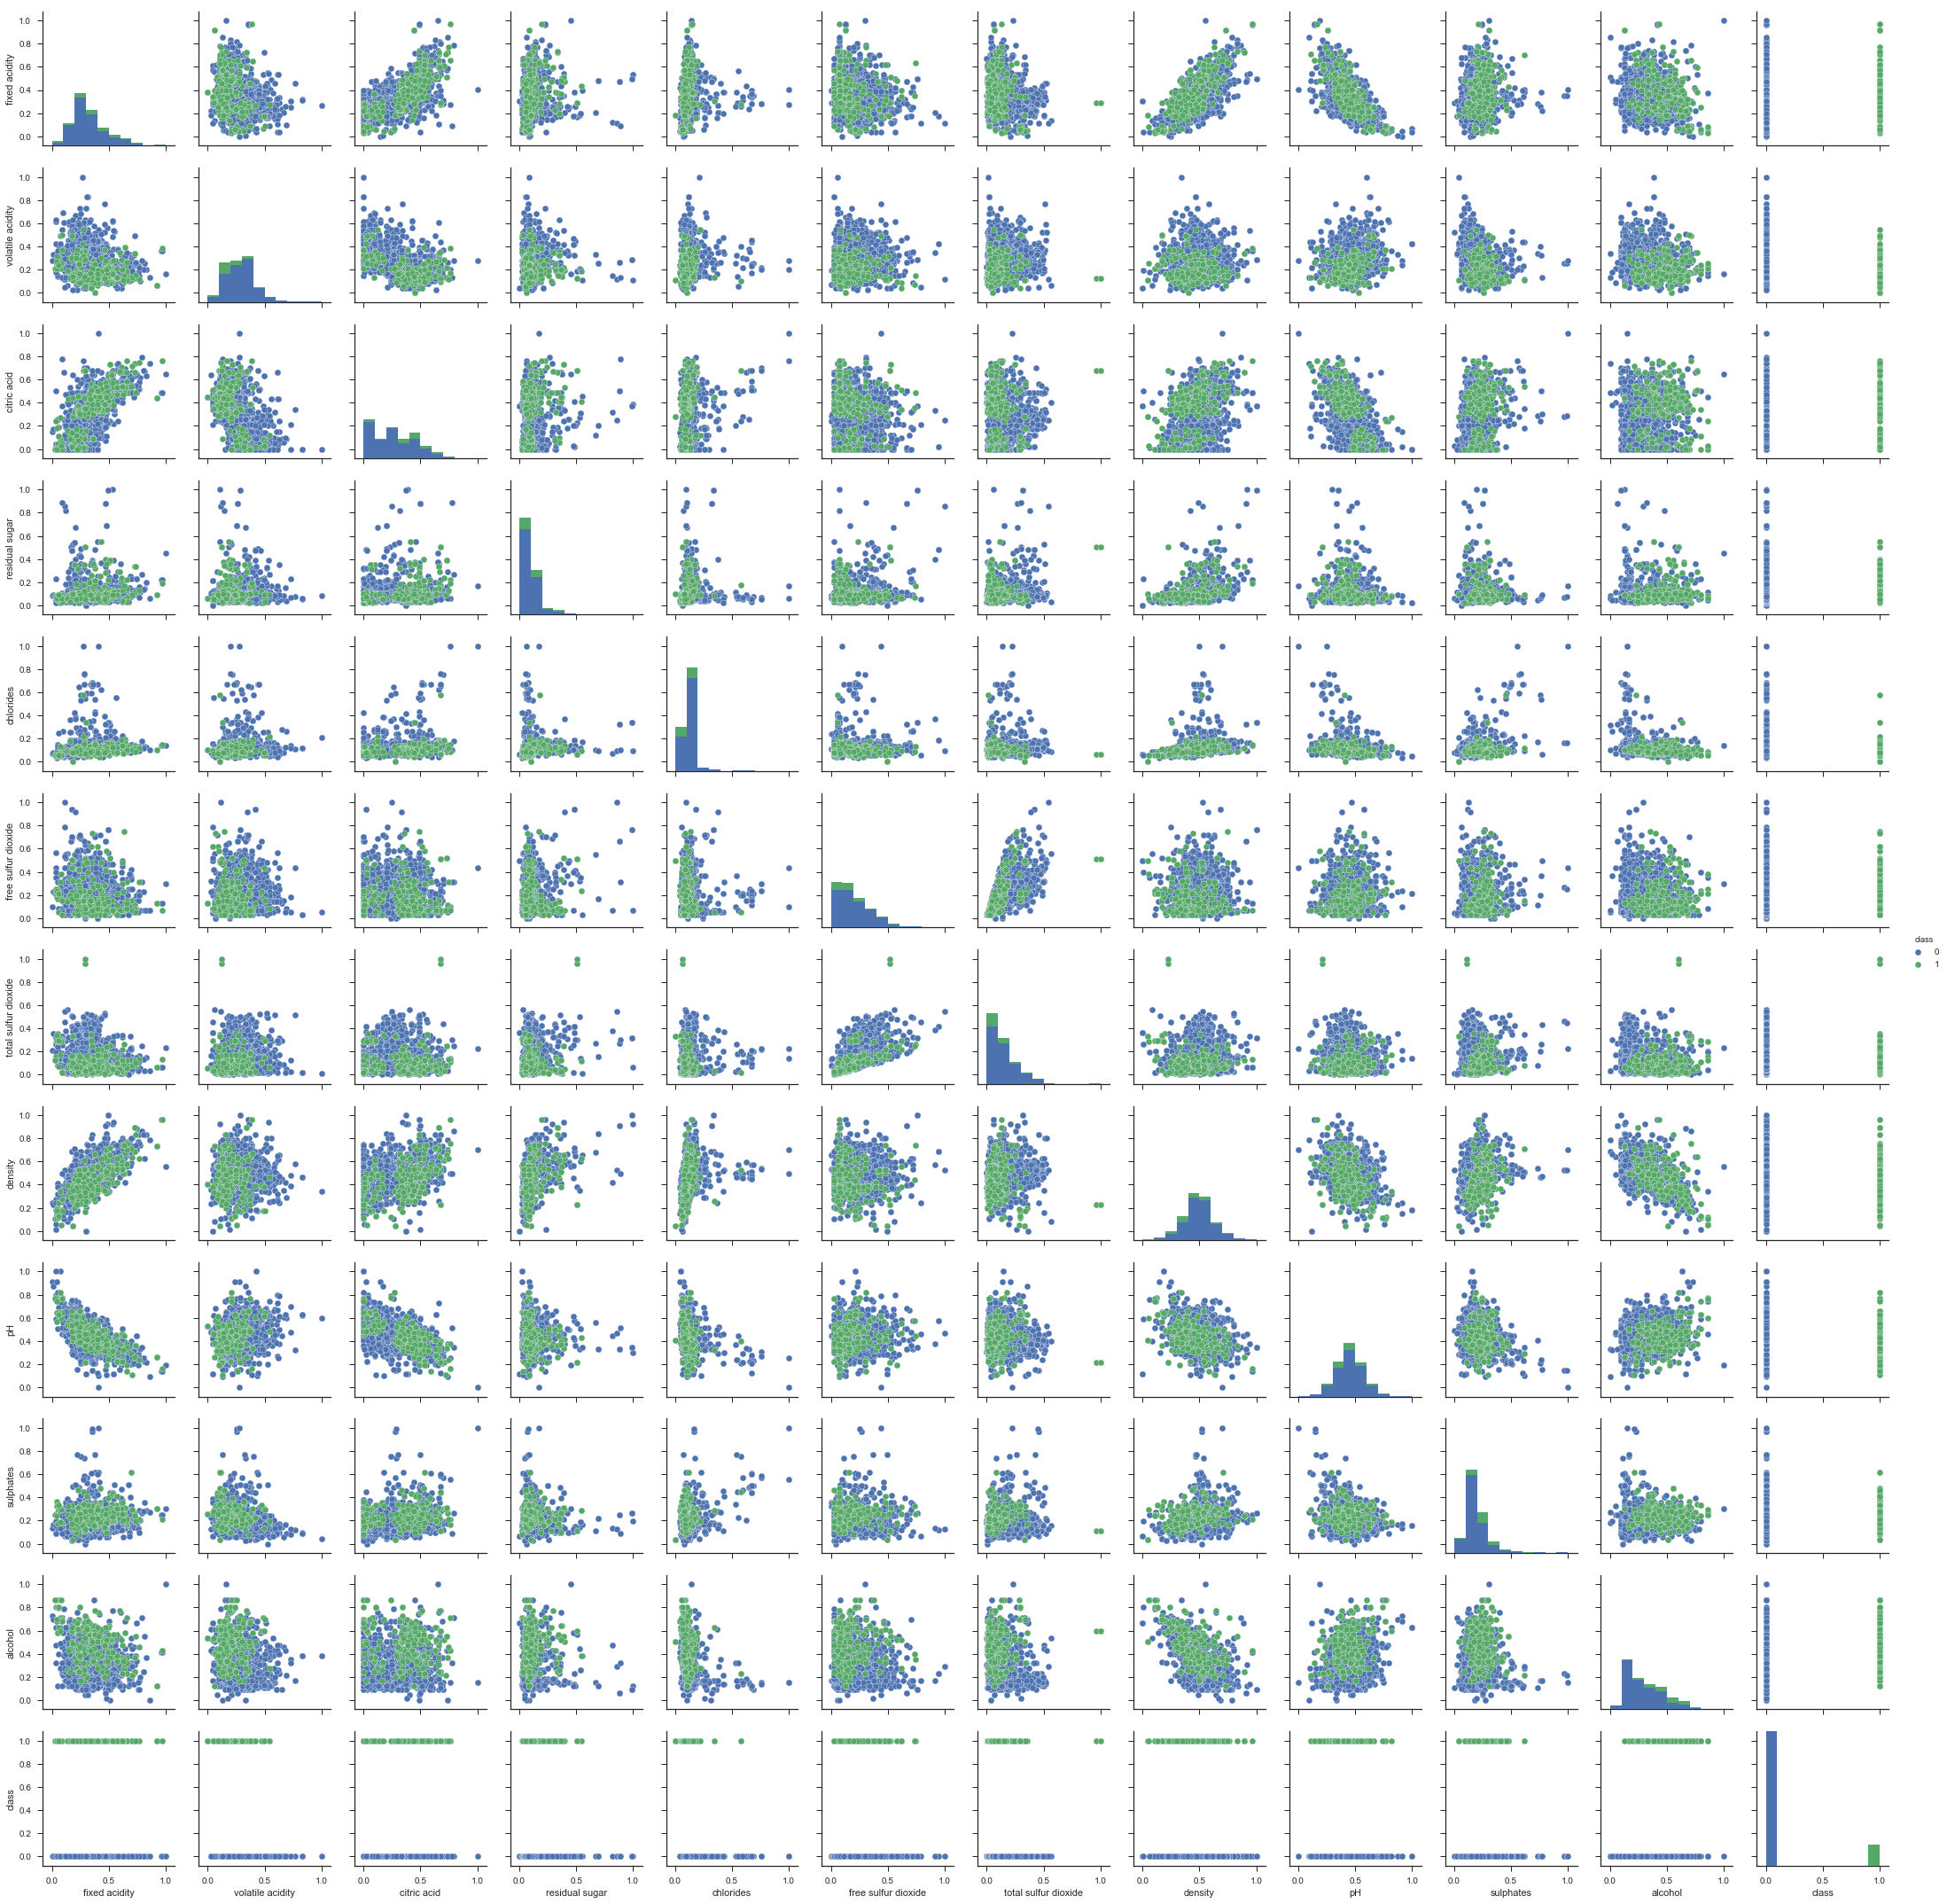

In [17]:
# Pairplot
sns.pairplot(new_df, hue='class')
plt.show()

### Still, both classes overlap...

In [18]:
X_train, X_test, y_train, y_test = train_test_split(red_normalized, y, random_state=1)
clf = LogisticRegression()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [19]:
clf.score(X_test, y_test)

0.90249999999999997

In [20]:
confusion_matrix(y_test, predictions)

array([[349,   6],
       [ 33,  12]])

#### The accuracy of the new model is 90%, but considering that a) it is very unbalanced (more than 85% of samples are in class 0), and b) we reduced the labels to just 2 clases, this result is not very promising. 